In [1]:
import sys
sys.path.append("./auto_ts")

In [2]:
import auto_ts as AT

C:\ProgramData\Anaconda3\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\ProgramData\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
C:\ProgramData\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.TXA6YQSD3GCQQC22GEQ54J2UDCXDXHWN.gfortran-win_amd64.dll
  stacklevel=1)


Imported Auto_Timeseries version: 0.0.16. Call by using:
        auto_ts.Auto_Timeseries(trainfile, ts_column,
                            sep=',', target=None, score_type='rmse', forecast_period=2,
                            timeinterval='Month', non_seasonal_pdq=None, seasonality=False,
                            seasonal_period=12, seasonal_PDQ=None,
                            verbose=0)
    To get detailed charts of actuals and forecasts, set verbose = 1


In [3]:
import pandas as pd
import numpy as np

In [4]:
datapath = 'example_datasets/'
filename1 = 'Google_Stock_Price_Train.csv'
filename2 = 'energy_dataset.csv'

In [5]:
train = pd.read_csv(datapath+filename1,index_col=None)[:100]
print(train.shape)
train.head(1)

(100, 6)


,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"


In [6]:
preds = [x for x in list(train) if x not in ['Date']]
len(preds)

5

In [7]:
train['Close'] = train['Close'].str.replace(',', '').astype(np.float32)
train['Volume'] = train['Volume'].str.replace(',', '').astype(np.float32)

In [8]:
#dft = dft.iloc[::48,]
dft = train[:1000]
print(dft.shape)
dft.head()

(100, 6)


,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.590027,7380500.0
1,1/4/2012,331.27,333.87,329.08,666.450012,5749400.0
2,1/5/2012,329.83,330.75,326.89,657.210022,6590300.0
3,1/6/2012,328.34,328.77,323.68,648.239990,5405900.0
4,1/9/2012,322.04,322.29,309.46,620.760010,11688800.0


In [9]:
ts_column = 'Date'
sep = ','
target = 'Close'
dft[[ts_column,target]].isnull().sum()

Date     0
Close    0
dtype: int64

In [10]:
score_type = 'rmse'
forecast_period = 5
timeinterval = 'Daily'
non_seasonal_pdq = (3, 1, 3)
seasonality = True
seasonal_periods = 24

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Input is data frame. Performing Time Series Analysis
    Target variable = Close
Time Interval is given as Daily
Running all model types. This will take a long time. Be Patient...

Running Facebook Prophet Model...
    Fit-Predict data (shape=(100, 2)) with Confidence Interval = 0.95...


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Building Forecast dataframe. Forecast Period = 5


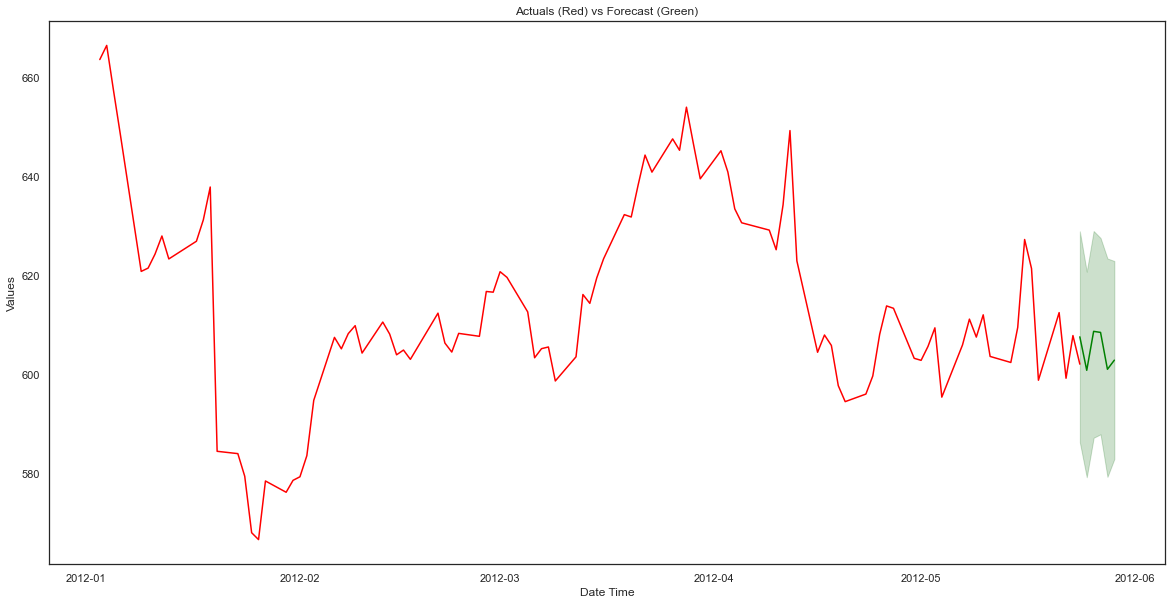

Error in FB Prophet components forecast. Continuing...
    RMSE = 5.52
    Std Deviation of Originals = 20.43
    Normalized RMSE = 27%

Running PyFlux Model...
Data Set split into train (95, 5) and test (5, 5) for Cross Validation Purposes
Cycling through various (p,d,q) parameters
................................
Best Params Selected (based on rmse): (3, 1, 3)


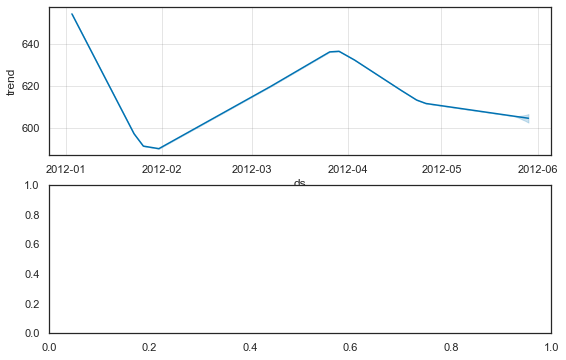

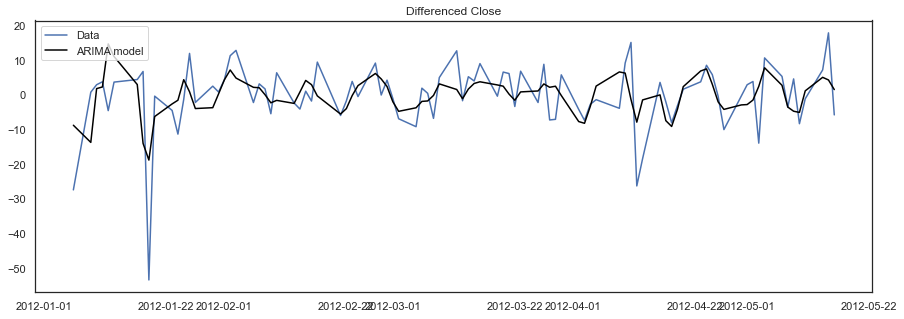

Normal ARIMA(3,1,3)                                                                                       
======================================================= ==================================================
Dependent Variable: Differenced Close                   Method: MLE                                       
Start Date: 2012-01-06 00:00:00                         Log Likelihood: -320.4771                         
End Date: 2012-05-17 00:00:00                           AIC: 656.9543                                     
Number of observations: 91                              BIC: 677.0412                                     
Latent Variable                          Estimate   Std Error  z        P>|z|    95% C.I.                 
======================================== ========== ========== ======== ======== =========================
Constant                                 -0.1449    1.1089     -0.1307  0.896    (-2.3185 | 2.0286)       
AR(1)                                

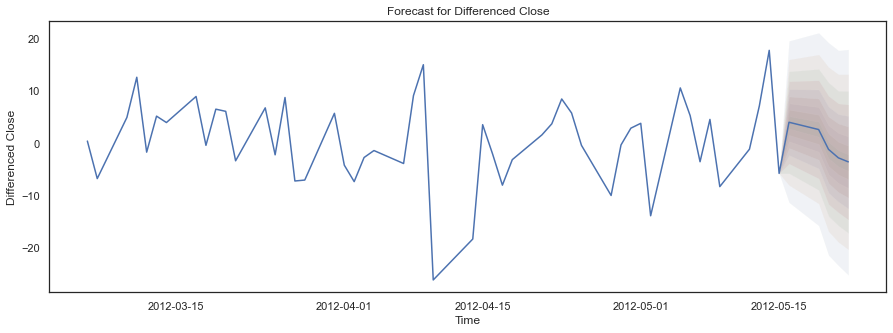

Dynamic 5-period Forecasts:
    RMSE = 18.07
    Std Deviation of Originals = 20.80
    Normalized RMSE = 87%

Running Non Seasonal ARIMA Model...
Data Set split into train (95,) and test (5,) for Cross Validation Purposes

Differencing = 0
 Iteration 0 completed...
 Iteration 10 completed...
    Best AR order p = 1, MA order q = 0, Interim metric = 700.485

Differencing = 1
 Iteration 20 completed...
 Iteration 30 completed...
    Best AR order p = 0, MA order q = 0, Interim metric = 692.165

Best model is: Non Seasonal ARIMA(0,1,0), aic = 692.165
####    Fitting best model for full data set now. Will take time... ######
Static Forecasts:
    ARIMA model error: predictions not available.

Running Seasonal SARIMAX Model...
Data Set split into train (95,) and test (5,) for Cross Validation Purposes
Building a Seasonal Model...

    Finding best Non-Seasonal pdq Parameters:

Differencing = 0
    Iteration 0 completed...
    Best AR order p = 3, MA order q = 3, Interim metric = 667.475

D

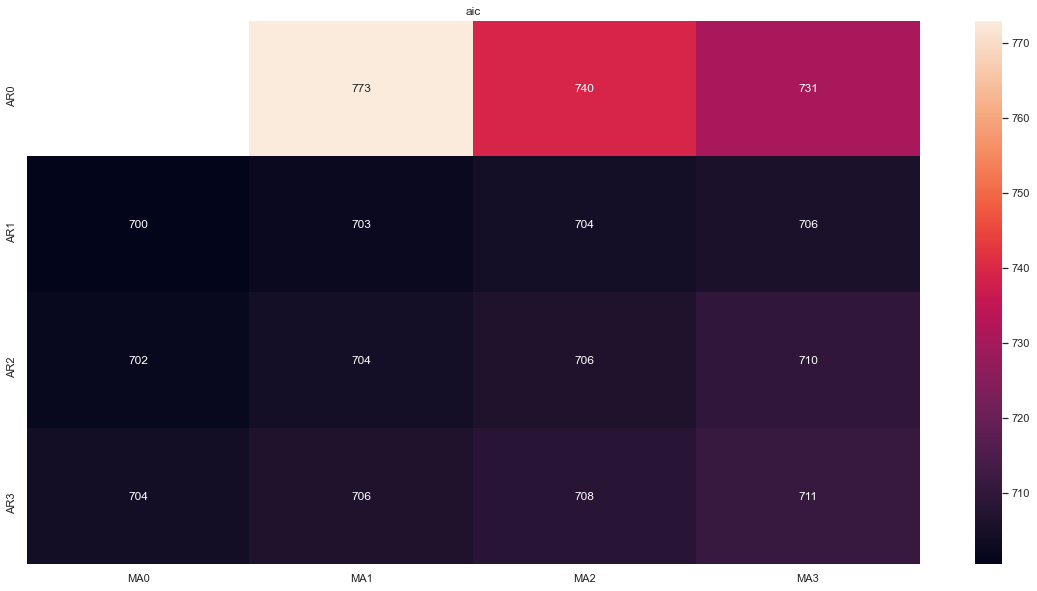

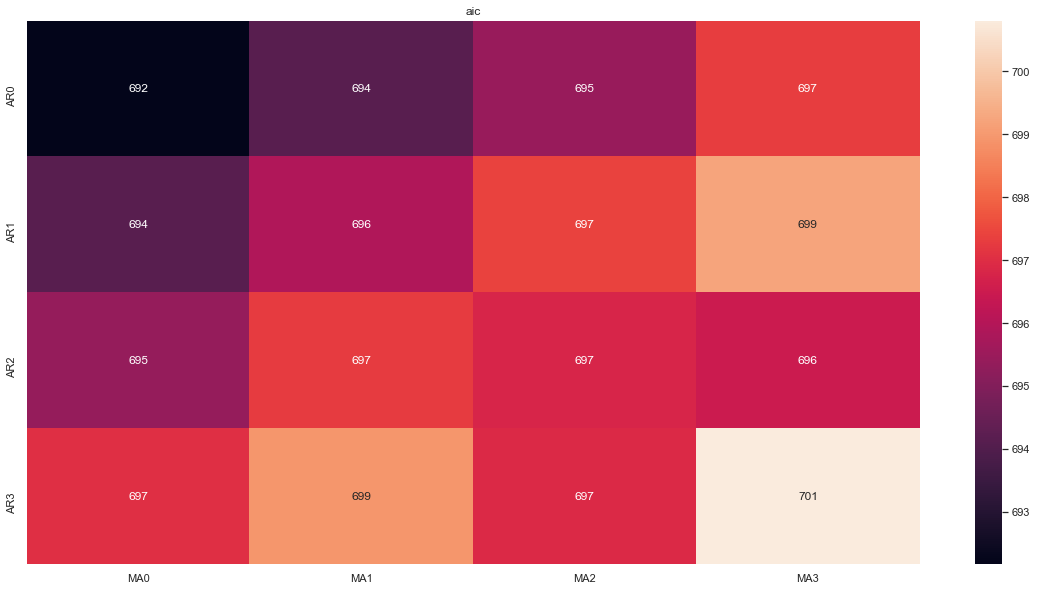

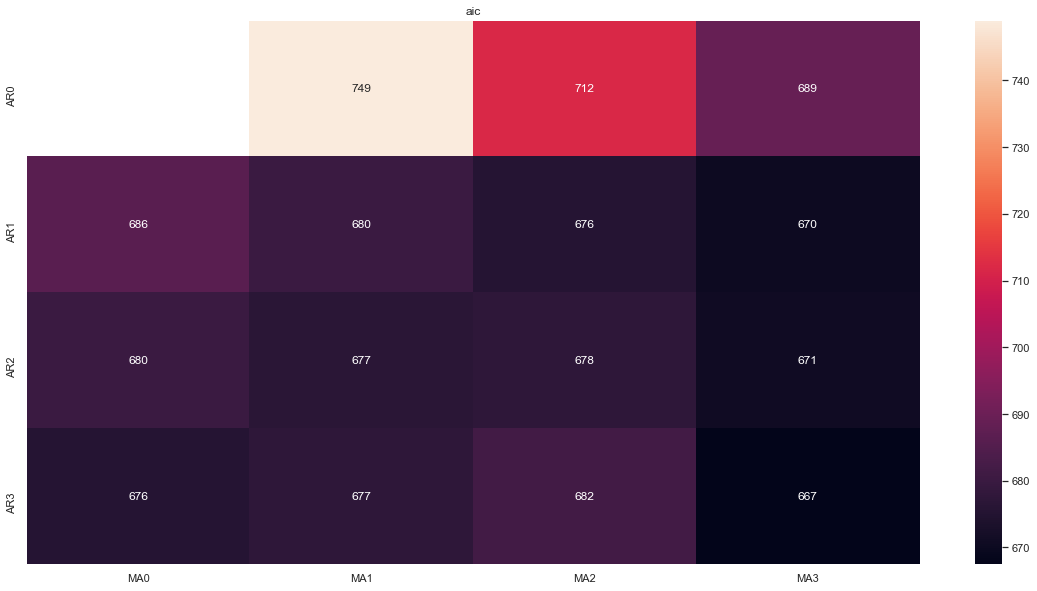

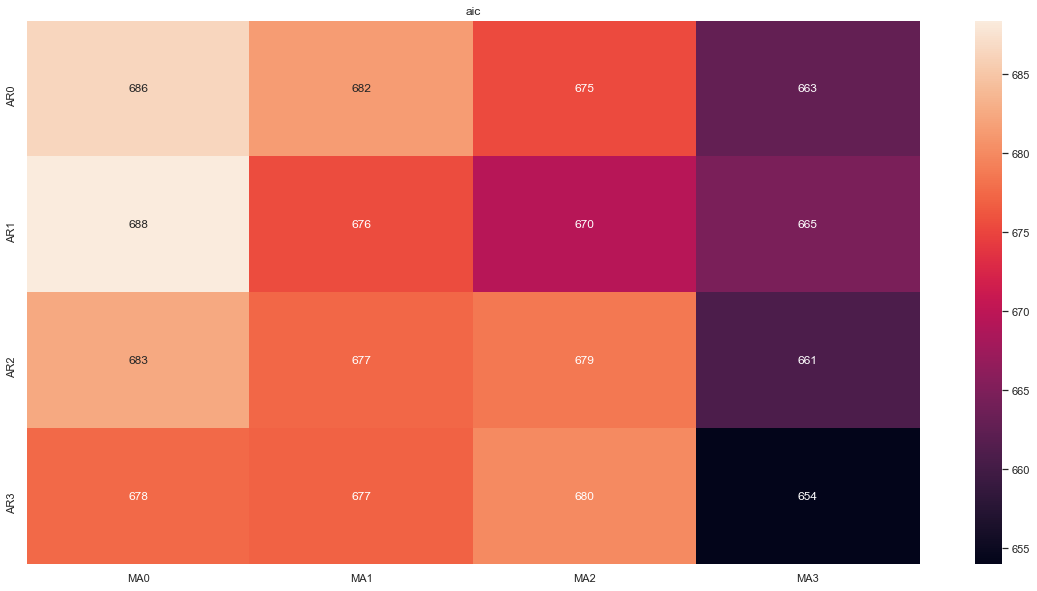

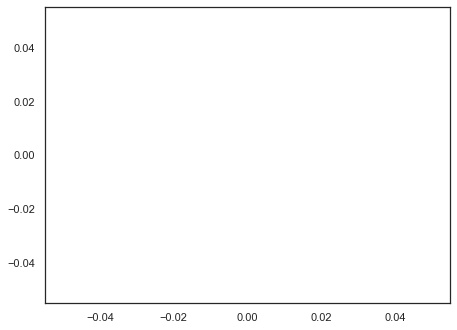

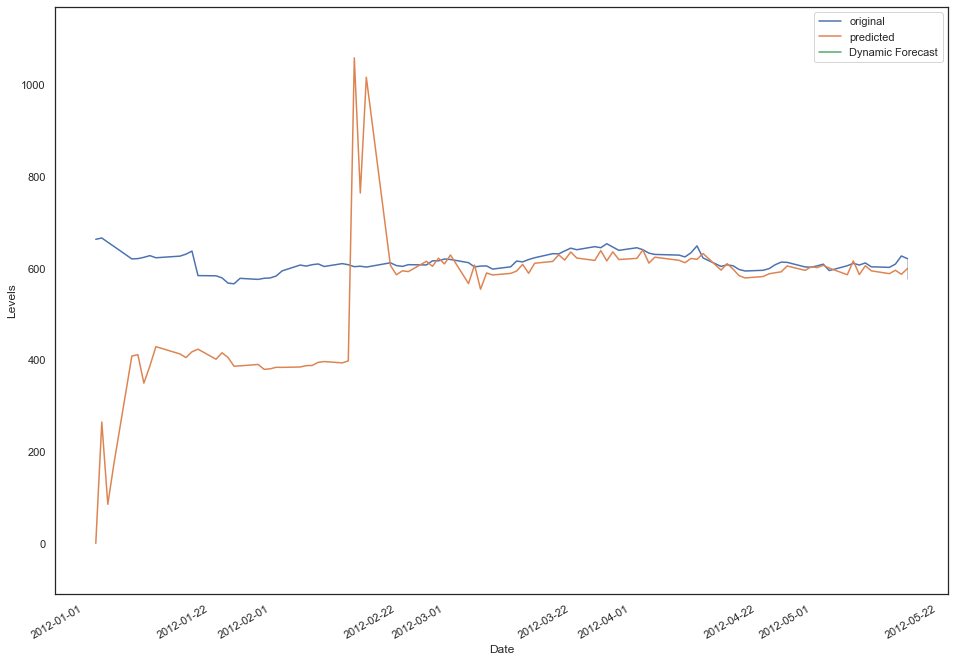

                                     SARIMAX Results                                      
Dep. Variable:                              Close   No. Observations:                   95
Model:             SARIMAX(3, 0, 3)x(3, 1, 3, 30)   Log Likelihood                   0.000
Date:                            Wed, 18 Mar 2020   AIC                             30.000
Time:                                    21:47:36   BIC                                nan
Sample:                                         0   HQIC                               nan
                                             - 95                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     11.1740         -0       -inf      0.000      11.174      11.174
drift         -0.3492         -0   

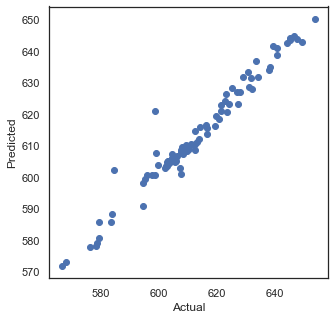

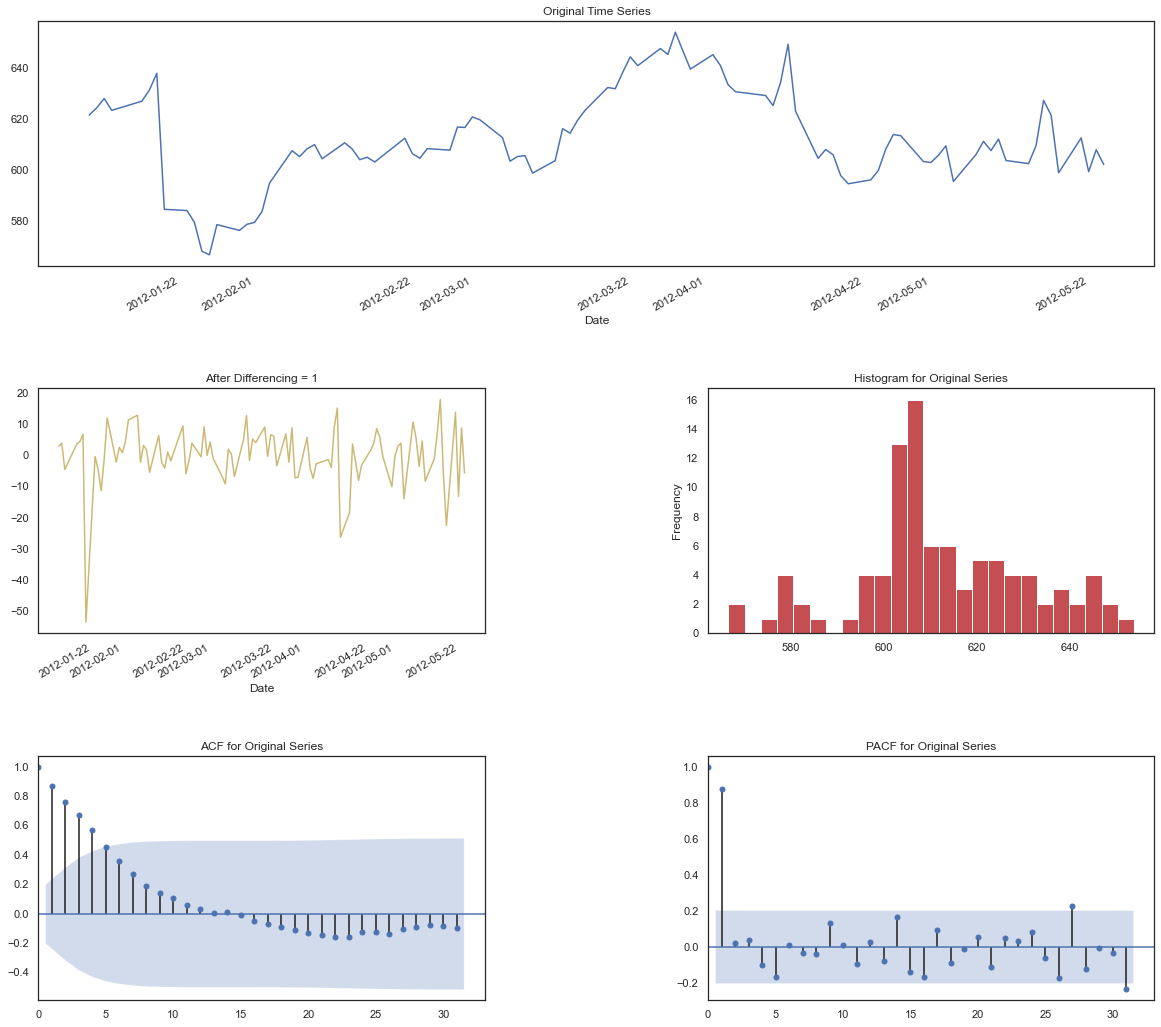


Best Model is:
    FB_Prophet
    Best Model Score: 5.52


In [11]:
mldict = AT.Auto_Timeseries(dft, ts_column,
                            sep, target, score_type, forecast_period,
                            timeinterval, non_seasonal_pdq, seasonality=seasonality,
                            seasonal_period=seasonal_periods, seasonal_PDQ=None, conf_int=0.95, 
                            model_type="all", verbose=1)